# Superstore Sales & Profitability Analysis

This notebook explores sales and profitability patterns in the Superstore dataset.
The goal is to identify which categories, sub-categories, and order types drive profit
and which contribute to losses.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading & Initial Inspection

In [34]:
df = pd.read_csv("data/superstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.info()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## Key Business Questions

This analysis focuses on the following questions:
1. Which categories and sub-categories drive the most profit?
2. Which areas consistently lose money?
3. How does profitability differ by shipping mode?
4. Where are the biggest optimization opportunities?

## Sales & Profit Overview

This section provides a high-level view of overall sales and profit performance across all orders, establishing a baseline before deeper segmentation.

In [26]:
df[['Sales', 'Profit']].describe()

,Sales,Profit
count,9994.000000,9994.000000
mean,229.858001,28.656896
std,623.245101,234.260108
min,0.444000,-6599.978000
25%,17.280000,1.728750
50%,54.490000,8.666500
75%,209.940000,29.364000
max,22638.480000,8399.976000


**Observations**

- Sales per order are highly right-skewed, with a small number of very large transactions driving a significant portion of total revenue.
- Profit distribution shows substantial variance, including extreme negative values, indicating that some orders generate large losses.
- The median profit is relatively low compared to the mean, suggesting that profitability is influenced by a limited number of high-performing orders.
- These patterns justify deeper analysis by category, sub-category, and operational factors to identify consistent profit drivers and loss sources.

## Category-Level Profitability

In [20]:
grouped= df.groupby('Category').agg(
    total_sales = ('Sales', 'sum'),
    total_profit =('Profit', 'sum'),
)
grouped['profit_margin'] = grouped['total_profit'] / grouped['total_sales']
grouped['profit_margin'] = grouped['profit_margin'] * 100
grouped = grouped.sort_values(by='profit_margin', ascending=False)
grouped

,total_sales,total_profit,profit_margin
Category,,,
Technology,836154.0330,145454.9481,17.395712
Office Supplies,719047.0320,122490.8008,17.035158
Furniture,741999.7953,18451.2728,2.486695


### Interpretation

Technology is the most profitable category, with the highest profit margin at approximately 17.4%.  
Office Supplies follows closely, while Furniture significantly underperforms with a much lower profit margin (~2.5%), despite comparable total sales.  

This suggests that Furniture may have pricing, cost, or discounting issues that negatively impact profitability.

## Sub-Category-Level Profitability

To better understand profitability drivers within each category, we analyze performance at the sub-category level by calculating total sales, total profit, and profit margin for each sub-category.

In [25]:
grouped= df.groupby('Sub-Category').agg(
    total_sales = ('Sales', 'sum'),
    total_profit =('Profit', 'sum'),
)
grouped['profit_margin'] = grouped['total_profit'] / grouped['total_sales']
grouped['profit_margin'] = grouped['profit_margin'] * 100


result = grouped[grouped['total_profit'] > 0]\
    .sort_values(by= 'profit_margin', ascending= False)
result

,total_sales,total_profit,profit_margin
Sub-Category,,,
Labels,12486.312,5546.2540,44.418672
Paper,78479.206,34053.5693,43.391837
Envelopes,16476.402,6964.1767,42.267582
Copiers,149528.030,55617.8249,37.195585
Fasteners,3024.280,949.5182,31.396504
Accessories,167380.318,41936.6357,25.054700
Art,27118.792,6527.7870,24.071083
Appliances,107532.161,18138.0054,16.867517
Binders,203412.733,30221.7633,14.857361


## Loss Analysis

This section identifies areas of negative profitability by analyzing orders with losses. 
We examine which categories and sub-categories contribute most to total losses to highlight 
potential operational or pricing issues.

In [ ]:
loss_df = df[df['Profit'] < 0]
loss_df.shape

(1871, 13)

In [31]:
loss_by_category = (
    loss_df
    .groupby('Category')['Profit']
    .sum()
    .sort_values()
)

loss_by_category

Category
Furniture         -60936.1090
Office Supplies   -56615.2585
Technology        -38579.9182
Name: Profit, dtype: float64

In [32]:
loss_by_subcategory = (
    loss_df
    .groupby('Sub-Category')['Profit']
    .sum()
    .sort_values()
)

loss_by_subcategory

Sub-Category
Binders       -38510.4964
Tables        -32412.1483
Machines      -30118.6682
Bookcases     -12152.2060
Chairs         -9880.8413
Appliances     -8629.6412
Phones         -7530.6235
Furnishings    -6490.9134
Storage        -6426.3038
Supplies       -3015.6219
Accessories     -930.6265
Fasteners        -33.1952
Name: Profit, dtype: float64

**Key observations:**
- Losses are not evenly distributed; a small number of sub-categories account for the majority of negative profit.
- Sub-categories such as *Binders*, *Tables*, and *Machines* are the largest consistent loss drivers.
- These losses suggest structural issues (pricing, discounting, or cost structure) rather than isolated outliers.
- Addressing these categories should be a priority before attempting to scale overall sales volume.

## Segment-Level Profitability

In this section, we analyze profitability across different customer segments to understand which segments contribute the most to overall profit and which may pose higher financial risk.

In [35]:
segment_summary = df.groupby('Segment').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
)

segment_summary['profit_margin'] = (
    segment_summary['total_profit'] / segment_summary['total_sales']
) * 100

segment_summary.sort_values(by='profit_margin', ascending=False)

,total_sales,total_profit,profit_margin
Segment,,,
Home Office,4.296531e+05,60298.6785,14.034269
Corporate,7.061464e+05,91979.1340,13.025506
Consumer,1.161401e+06,134119.2092,11.548050


**Key observations:**
- The Consumer segment generates the highest total profit, driven by high sales volume.
- The Home Office segment shows the highest profit margin, indicating stronger per-order efficiency.
- Profitability varies meaningfully across customer segments, suggesting differences in pricing sensitivity, discounting, or purchasing behavior.

## Shipping & Operational Analysis

This section examines profitability across different shipping modes to evaluate whether faster or premium shipping options justify their operational cost. We analyze total sales, total profit, and profit margin by ship mode.

In [36]:
ship_summary = df.groupby('Ship Mode').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
)

ship_summary['profit_margin'] = (
    ship_summary['total_profit'] / ship_summary['total_sales']
) * 100

ship_summary.sort_values(by='profit_margin', ascending=False)

,total_sales,total_profit,profit_margin
Ship Mode,,,
First Class,3.514284e+05,48969.8399,13.934513
Second Class,4.591936e+05,57446.6354,12.510331
Same Day,1.283631e+05,15891.7589,12.380315
Standard Class,1.358216e+06,164088.7875,12.081202


**Key observations:**
- Profitability varies meaningfully across shipping modes.
- Higher-cost or faster shipping options do not necessarily produce higher profit margins.
- Standard shipping appears to offer the most operationally efficient balance between volume and profitability.

These results suggest that shipping strategy plays a meaningful role in overall business performance and should be considered alongside pricing and discount policies.

## Visualizations

The following visualizations summarize key findings from the analysis, highlighting profitability differences across categories, sub-categories, customer segments, and shipping modes.

<Axes: title={'center': 'Total Profit by Category'}, xlabel='Category', ylabel='Profit'>

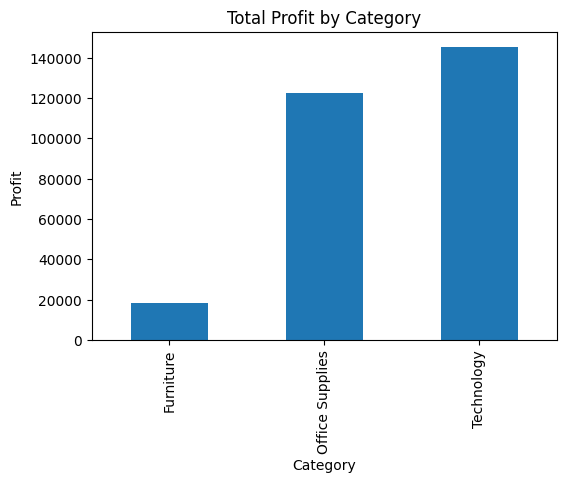

In [38]:
df.groupby('Category')['Profit'].sum().sort_values().plot(
    kind='bar',
    title='Total Profit by Category',
    ylabel='Profit',
    figsize=(6,4)
)

<Axes: title={'center': 'Top 10 Sub-Categories by Profit Margin'}, xlabel='Sub-Category', ylabel='Profit Margin'>

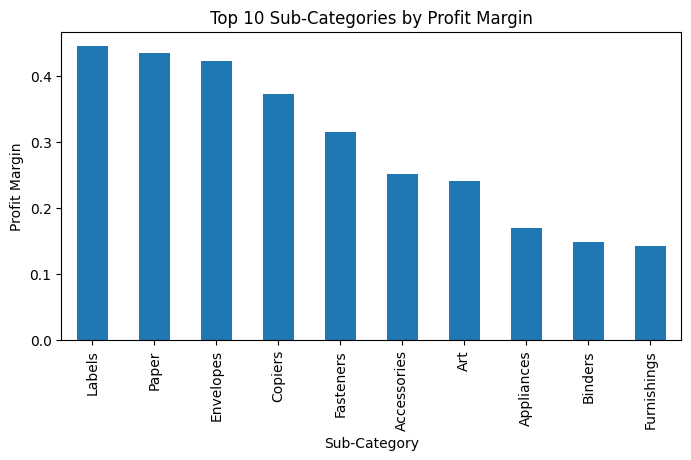

In [ ]:
subcat_margin = (
    df.groupby('Sub-Category')
      .agg(total_sales=('Sales', 'sum'), total_profit=('Profit', 'sum'))
)

subcat_margin['profit_margin'] = subcat_margin['total_profit'] / subcat_margin['total_sales'] 

subcat_margin.sort_values(by='profit_margin', ascending=False).head(10)['profit_margin'].plot(
    kind='bar',
    title='Top 10 Sub-Categories by Profit Margin',
    ylabel='Profit Margin',
    figsize=(8,4)
)

<Axes: title={'center': 'Profit Margin by Shipping Mode'}, xlabel='Ship Mode', ylabel='Profit Margin (%)'>

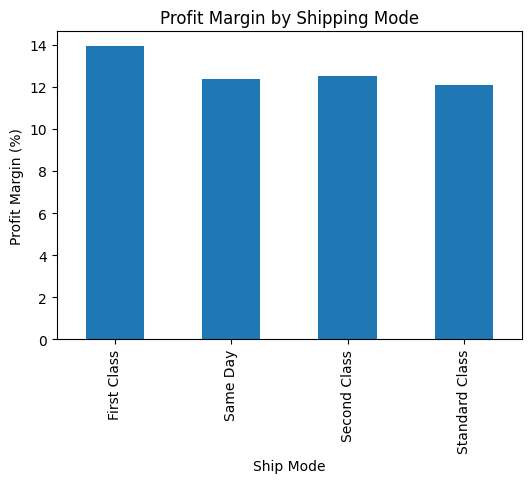

In [41]:
ship_summary['profit_margin'].plot(
    kind='bar',
    title='Profit Margin by Shipping Mode',
    ylabel='Profit Margin (%)',
    figsize=(6,4)
)

These visualizations reinforce earlier findings: profitability is unevenly distributed across categories and sub-categories, while shipping mode and customer segment also meaningfully impact margins.

## Key Insights & Next Steps

### Key Insights
- Technology is the most profitable category overall, while Furniture consistently underperforms.
- Losses are concentrated in a small number of sub-categories (e.g., Binders, Tables, Machines), indicating targeted operational or pricing issues.
- The Consumer segment generates the highest total profit, while Home Office delivers the strongest profit margin.
- Faster or premium shipping options do not necessarily produce higher profit margins, suggesting standard shipping is the most operationally efficient.

### Next Steps
- Investigate pricing, discounting, and cost structures for loss-driving sub-categories.
- Analyze discount levels and their relationship to profitability.
- Expand analysis to regional performance and customer behavior trends.
- Apply these findings to predictive modeling or demand forecasting in future work.